## 4.2 선형회귀분석의 기초

회귀분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ 
\hat{y} = f \left( x \right) \approx y 
$$

만약 $f(x)$가 다음과 같은 선형함수면 이 함수를 **선형회귀모형(linear regression model)**이라고 한다. 선형회귀모형을 사용하는 회귀분석은 선형회귀분석이라고 한다.

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx 
$$

위 식에서 독립변수 $x=(x_1, x_2, \ldots, x_D)$는 $D$차원 벡터다. 가중치 벡터 $w=(w_0, \cdots, w_D)$는 함수 $f(x)$의 계수(coefficient)이자 이 선형회귀모형의 **모수(parameter)**라고 한다. 

### 상수항 결합

회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 **상수항 결합**(bias augmentation)작업이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

상수항 결합을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

이렇게 되면 전체 수식이 다음과 같이 상수항이 추가된 가중치 벡터 $w$와 상수항이 추가된 입력 데이터 벡터 $x$의 내적으로 간단히 표시된다.

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

일반적으로 선형회귀모형은 항상 상수항 결합을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 상수항 결합이 되어있는 것으로 볼 수 있다.

statsmodels 패키지는 상수항 결합을 위한 `add_constant` 함수를 제공한다.

In [1]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [2]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

### 최소자승법

최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법이다. 

우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형모형이다.

$$ \hat{y} = Xw $$

이때 잔차 벡터(residual vector) $e$는 

$$ e = {y} - \hat{y} = y - Xw $$

이고 잔차 제곱합(RSS:residual sum of squares)은

$$
\begin{aligned}
\text{RSS}
&=  e^Te \\
&= (y - Xw)^T(y - Xw) \\
&= y^Ty - 2y^T X w + w^TX^TXw  
\end{aligned}
$$

이다. 잔차의 크기(잔차 제곱합)를 가장 작게 하는 가중치 벡터를 구하기 위해 이 식을 미분하여 잔차 제곱합의 그레디언트(gradient) 벡터를 구하면 다음과 같다.

$$ 
\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w 
$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$ 
\dfrac{d \text{RSS}}{d w} = 0 
$$

$$ 
X^TX w^{\ast} = X^T y 
$$

만약 $X^TX$ 행렬의 역행렬이 존재한다면 다음처럼 최적 가중치 벡터 $w^{\ast}$를 구할 수 있다.

$$ 
w^{\ast} = (X^TX)^{-1} X^T y 
$$

$X^TX$ 행렬의 역행렬이 존재하고 위에서 구한 값이 최저값이 되려면 잔차 제곱합의 헤시안 행렬인 $X^TX$가 양의 정부호(positive definite)이어야 한다.

$$ 
\frac{d^2 \text{RSS}}{dw^2} = 2X^TX > 0 
$$

$X$의 각 행렬이 서로 독립($X$가 풀랭크)이 아니면 $X^TX$가 양의 정부호가 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없다.

### 직교 방정식

여기에서 그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 **직교 방정식(normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

$$ X^T (y - X w ) = 0 $$

$$ X^T e = 0 $$

즉, $c_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터(특징 행렬의 열벡터)라고 할 때 모든 차원 $d \; (d=0, \ldots, D)$에 대해  $c_d$는 잔차 벡터 $e$와 직교다.

$$ c_d^T e = 0 \;\;\; (d=0, \ldots, D) $$

또는 

$$ c_d \perp e \;\;\; (d=0, \ldots, D) $$

직교 방정식으로부터 다음과 같은 성질을 알 수 있다.

(1) 모형에 상수항이 있는 경우에 잔차 벡터의 원소의 합은 0이다. 즉, 잔차의 평균은 0이다.

$$ \sum_{i=0}^N e_i = 0 $$

(2) $x$ 데이터의 평균값 $\bar{x}$에 대한 예측값은 $y$ 데이터의 평균값 $\bar{y}$이다.

$$ \bar{y} = w^T \bar{x} $$

1번 성질은 상수항 결합이 되어 있으면 $X$의 첫번째 열이 1-벡터라는 것을 이용하여 증명할 수 있다.

$$ c_0^T e = \mathbf{1}^T e = \sum_{i=0}^N e_i = 0 $$

2번 성질은 다음처럼 증명한다.

$$
\begin{aligned}
\bar{y} 
&= \dfrac{1}{N}\mathbf{1}^T y \\
&= \dfrac{1}{N}\mathbf{1}^T (Xw + e) \\
&= \dfrac{1}{N}\mathbf{1}^TXw + \dfrac{1}{N}\mathbf{1}^Te \\
&= \dfrac{1}{N}\mathbf{1}^TXw \\
&= \dfrac{1}{N}\mathbf{1}^T \begin{bmatrix}c_1 & \cdots & c_M \end{bmatrix} w \\
&= \begin{bmatrix}\dfrac{1}{N}\mathbf{1}^Tc_1 & \cdots & \dfrac{1}{N}\mathbf{1}^Tc_D \end{bmatrix} w \\
&= \begin{bmatrix}\bar{c}_1 & \cdots & \bar{c}_D \end{bmatrix} w \\
&= \bar{x}^T w \\
\end{aligned}
$$


### NumPy를 이용한 선형 회귀분석

이제 NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석을 해보자.
우선 `make_regression` 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [3]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

우리가 준 바이어스 값은 100이고 `make_regression` 명령이 생성한 모수 값은 다음과 같다.

In [4]:
w

array(86.44794301)

따라서 x와 y는 다음과 같은 관계를 가진다.

$$ y = 100 + 86.44794301 x + \epsilon $$

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

In [5]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

즉, 최소자승법으로 구한 선형회귀모형은 다음과 같다.

$$ 
\hat{y} = 99.79150869 + 86.96171201 x 
$$

이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 가중치 벡터는 **정답과 비슷하지만 똑같지는 않다**는 점이다.

이 식에 여러가지 $x$값을 대입하여 $\hat{y}$을 구해본 결과를 원래 데이터와 비교하면 다음 그림과 같다.

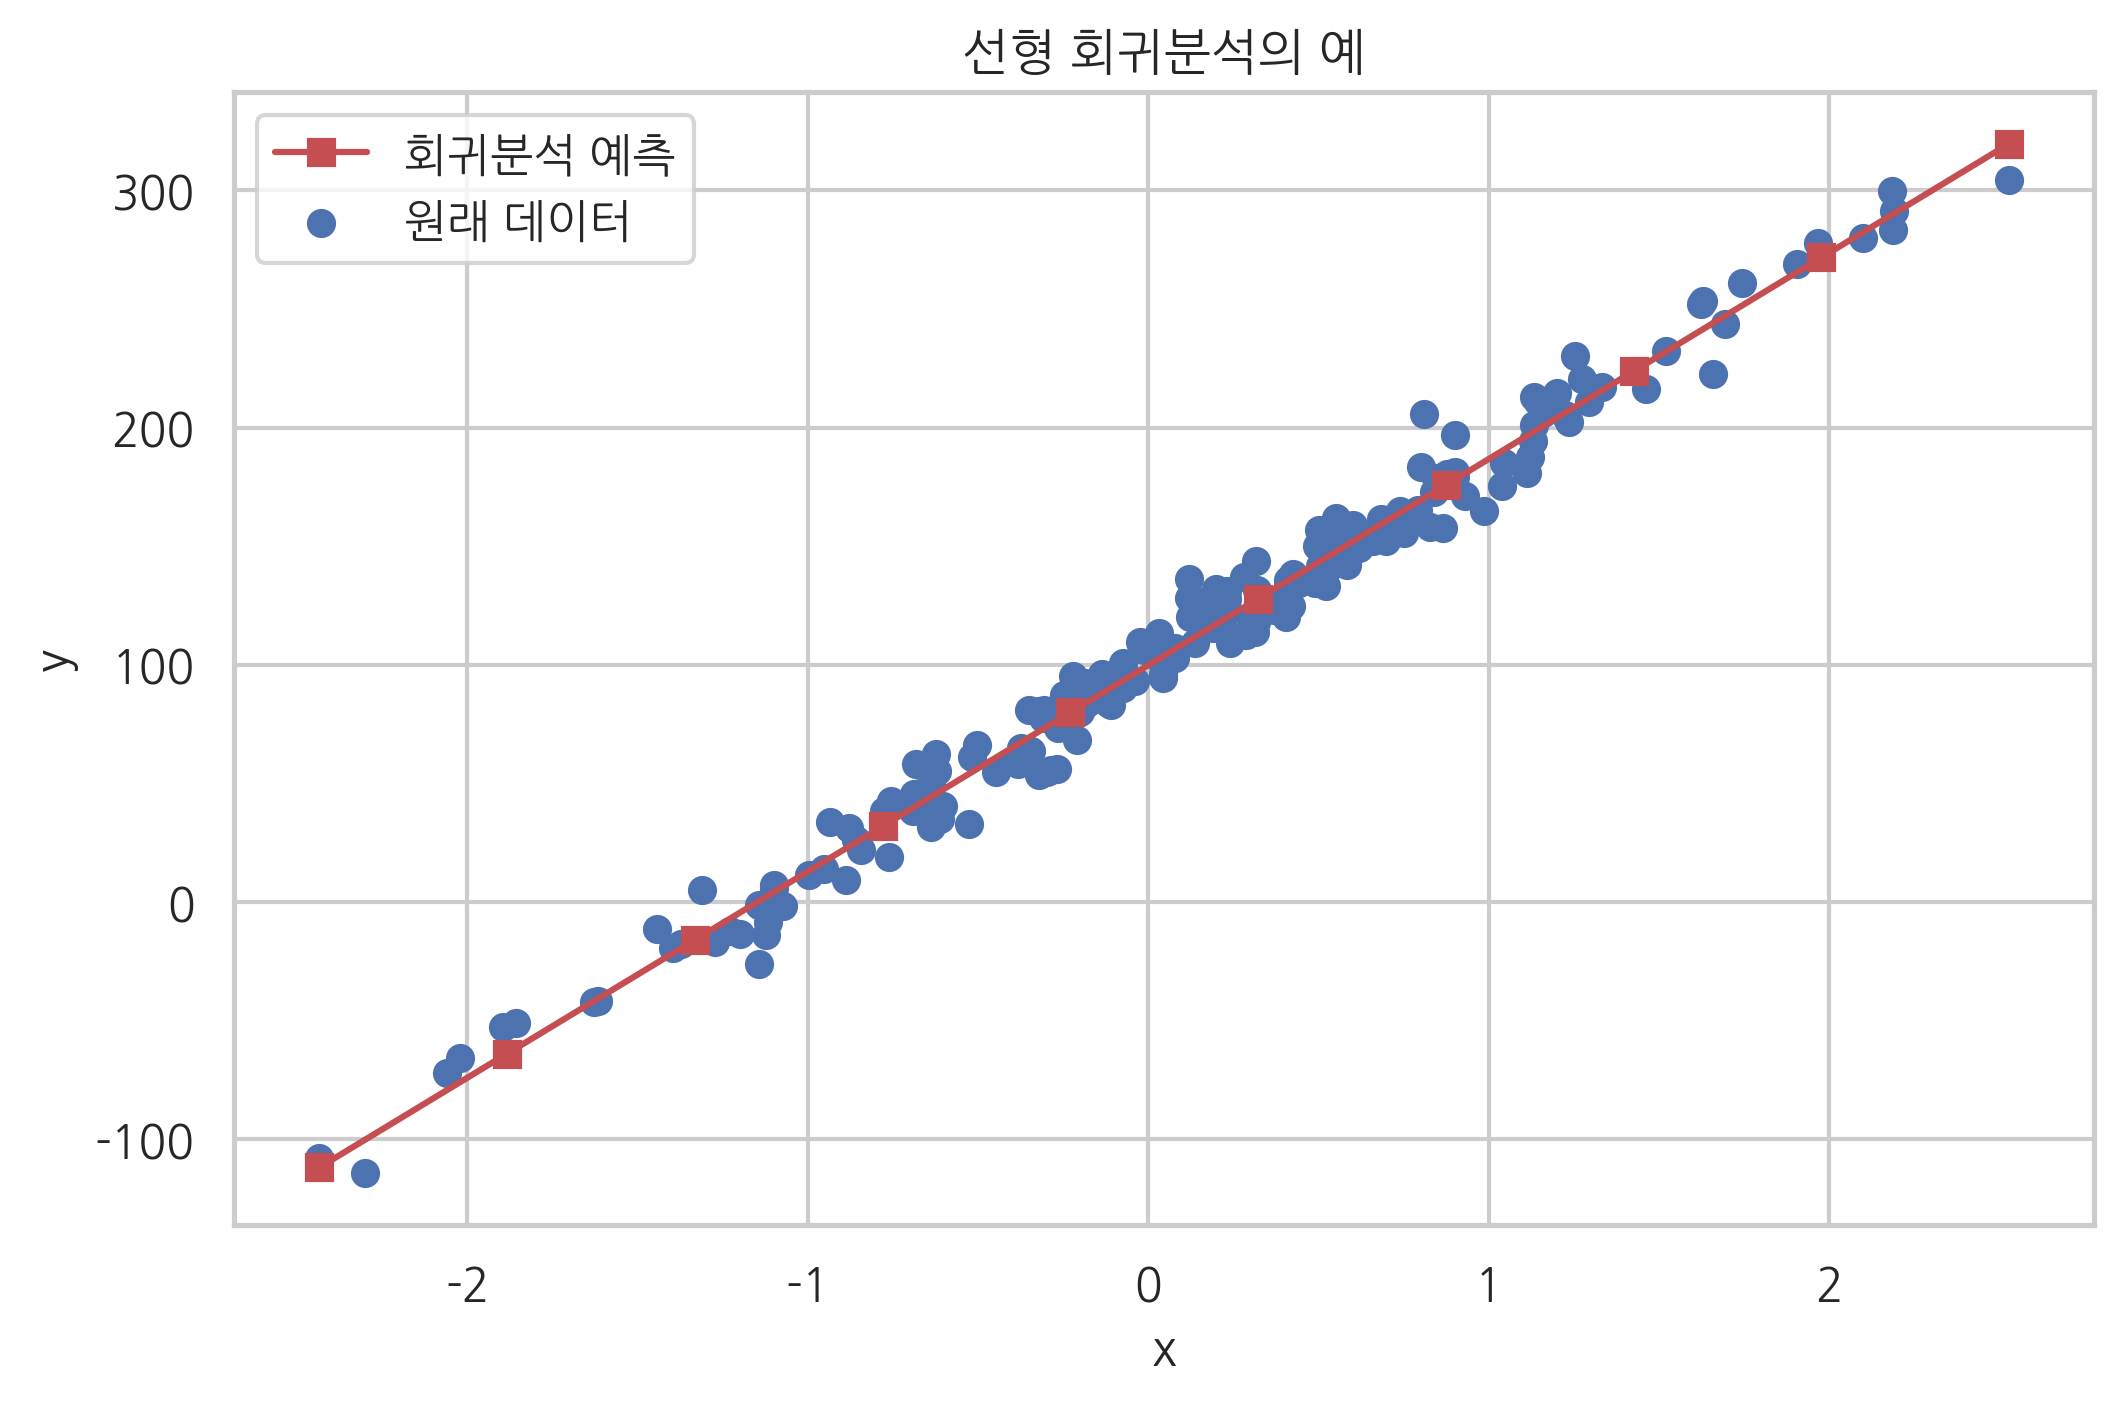

In [6]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

###  scikit-learn 패키지를 사용한  선형 회귀분석

scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.


(1) `LinearRegression` 클래스 객체를 생성한다.

```
model = LinearRegression(fit_intercept=True)
```

`fit_intercept` 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 디폴트 값이 `True`다. 만약 상수항이 없으면 `fit_intercept=False`로 설정한다.



(2) `fit` 메서드로 가중치 값을 추정한다. 상수항 결합을 자동으로 해주므로 사용자가 직접 `add_constant` 등의 명령를 써서 상수항 결합을 할 필요는 없다.

```
model = model.fit(X, y)
```

`fit` 메서드를 호출하면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 `fit` 메서드는 객체 자신을 반환한다.

* `coef_` : 추정된 가중치 벡터
* `intercept_` : 추정된 상수항 



(3) `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측

```
y_new = model.predict(x_new)
```

위 예제를 `LinearRegression` 클래스로 선형회귀를 하면 다음과 같다.

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


`predict` 메서드를 사용하면 새로운 $x_{new}$ 값에 대응하는 $y$ 값을 예측할 수 있다. $x_{new}$ 값으로 2차원 배열을 써야한다는 점을 주의한다.

In [8]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

### statsmodels 패키지를 사용한 선형 회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형 회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.

1. 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다. 


2. `OLS` 클래스 객체 생성. 이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다. 
   data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.
    ```
    model = OLS.from_formula(formula, data=df)
    ```
    또는 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있다. 이 때는 독립변수만 있는 데이터프레임 `dfX`가 상수항을 가지고 있어야 한다.
    
    ```
    model = OLS(dfy, dfX)
    ```
    
    
3. `fit` 메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    ```
    result = model.fit()
    ```

4. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해 주어야 한다.

위 1차원 데이터 예제를 statsmodels의 `OLS` 명령으로 선형회귀를 하면 다음과 같다. 우선 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다.

In [9]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


다음으로 모델 객체를 만든다. 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있다. 이 때는 수동으로 상수항 추가를  해주어야 한다. 

In [10]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

또는 formula 문자열을 사용하여 모형을 만들 수도 있다. formula 문자열을 만드는 방법은 `~` 기호의 왼쪽에 종속변수의 이름을 넣고 `~` 기호의 오른쪽에 독립변수의 이름을 넣는다. 만약 독립변수가 여러개일 경우에는 patsy 패키지의  formula 문자열을 만드는 법을 따른다.

In [11]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

`RegressionResults` 클래스 객체의 `summary` 메서드는 복잡한 형태의 보고서를 보여준다. 보고서의 자세한 내용에 대해서는 확률적 회귀모형에서 추후 설명한다. 여기에서는 coef 열의 값이 가중치값이라는 것만 알면 된다.

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          8.17e-182
Time:                        21:54:22   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

`RegressionResults` 클래스 객체의 `predict` 메서드를 사용하면 새로운 $x_{new}$ 값에 대응하는 $y$ 값을 예측할 수 있다.

In [13]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* `params`: 가중치 벡터
* `resid`: 잔차 벡터

가중치 벡터의 값은 다음처럼 확인한다.

In [14]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

잔차 벡터의 형태는 다음과 같다.

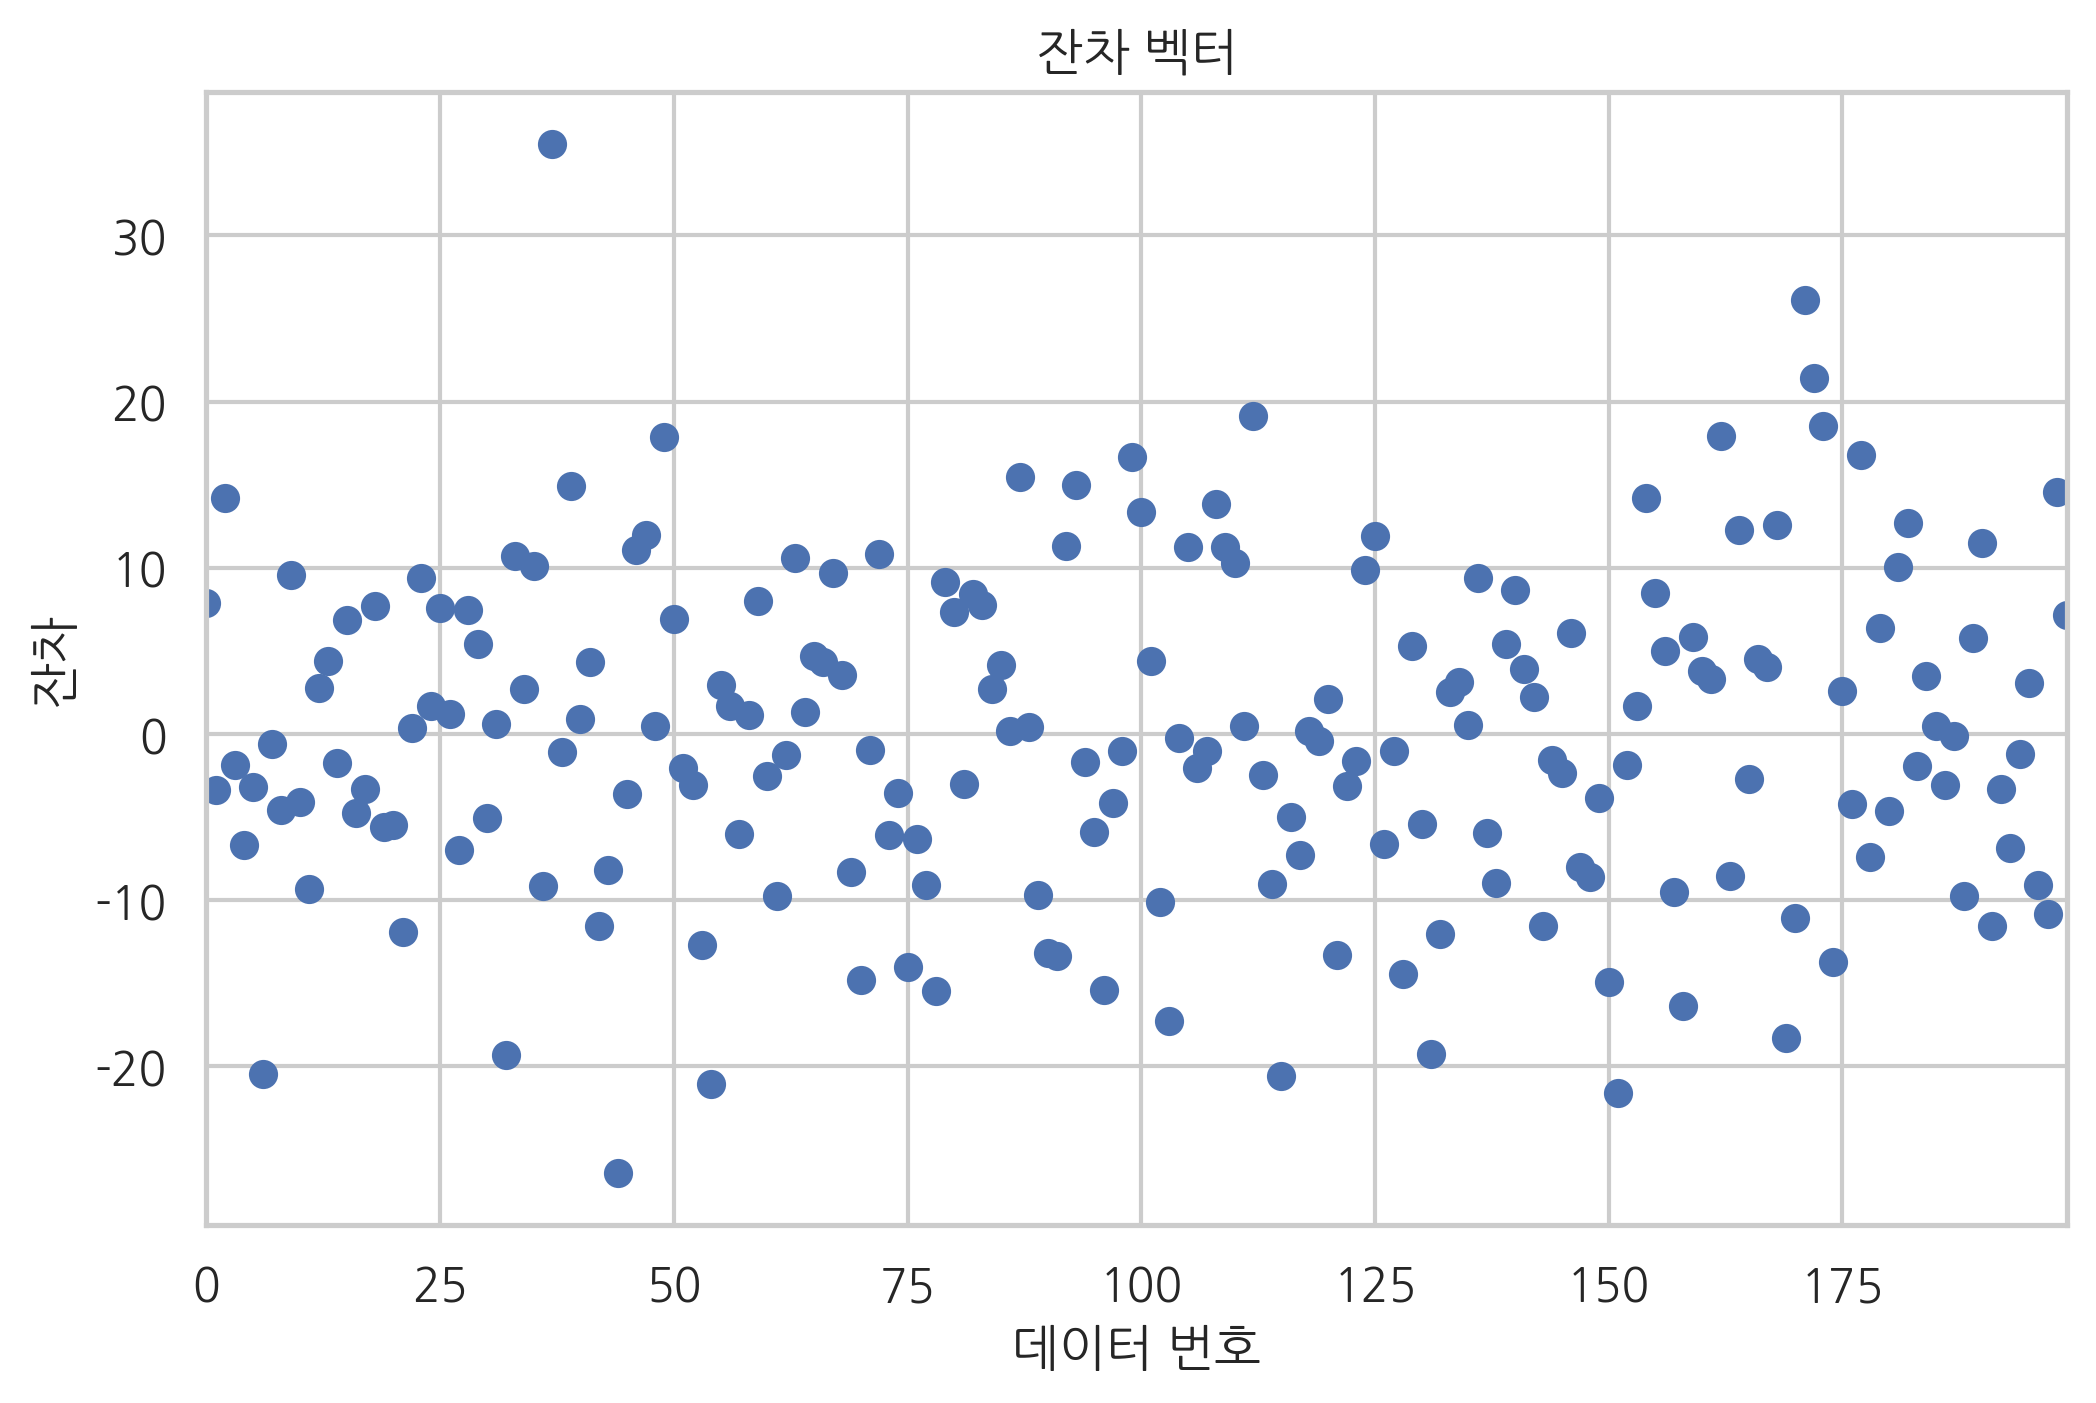

In [15]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

직교방정식에서 나온 두 가지 성질이 성립하는지 살펴보자. 우선 잔차의 합을 구하면 0이라는 것을 알 수 있다.

In [16]:
result.resid.sum()

3.7339020764193265e-12

다음으로 x의 평균값을 넣으면 y의 평균값과 같은 값이 나온다는 것도 확인할 수 있다.

In [17]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [18]:
y.mean()

109.06935068170775

### 보스턴 집값 예측

보스턴 집값 데이터를 statsmodels의 `OLS` 명령으로 분석한 결과는 다음과 같다. 

In [19]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        21:54:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

따라서 보스턴 집값을 예측하는 식은 다음과 같다.

$$
\begin{aligned}
y &= 36.4595 - 0.1080\,\text{CRIM} + 0.0464\,\text{ZN}  + 0.0206\,\text{INDUS}  + 2.6867 \,\text{CHAS} \\
&  -17.7666\,\text{NOX}  + 3.8099\,\text{RM}  + 0.0007\,\text{AGE}  -1.4756\,\text{DIS} + 0.3060\,\text{RAD} \\
&  -0.0123\,\text{TAX}  -0.9527\,\text{PTRATIO}  + 0.0093 \,\text{B} -0.5248\,\text{LSTAT}
\end{aligned}
$$